In [76]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import pylab as pl

In [77]:
WINDOW = 4

# Using All Weather Variables - Redundant

In [78]:
FILENAME = "engineered_worldweatheronline_normalized_manila_2015_1day"
weather_dataset = pd.read_csv("windows_" + FILENAME + "/" + FILENAME + "_win" + str(WINDOW) + ".csv", skipinitialspace=True)
precip = weather_dataset.precipMM
weather_dataset = weather_dataset.drop(weather_dataset.columns[0], axis=1)

cols_to_remove = []
# For Window 1 LANG
temp = list(range(12, 16))
windspd = list(range(16, 20))
cond = list(range(20, 24))
hum = list(range(24, 28))
vis = list(range(28, 32))
pres = list(range(32, 36))
cloud = list(range(36, 40))
heatindex = list(range(40, 44))
dewpoint = list(range(44, 48))
windchill = list(range(48, 52))
windgust = list(range(52, 56))
feelslike = list(range(56, 60))


# For Window 2 and above
if WINDOW >= 2:
    temp = list(range(12, 15))
    windspd = list(range(15, 18))
    cond = list(range(18, 21))
    hum = list(range(21, 24))
    vis = list(range(24, 27))
    pres = list(range(27, 30))
    cloud = list(range(30, 33))
    heatindex = list(range(33, 36))
    dewpoint = list(range(36, 39))
    windchill = list(range(39, 42))
    windgust = list(range(42, 45))
    feelslike = list(range(45, 48))

cols_to_remove = [heatindex + windchill + feelslike]
#cols_to_remove = [temp  + windspd + cond + hum + vis + pres + cloud + heatindex + dewpoint + windchill + windgust + feelslike]
w = weather_dataset.drop(weather_dataset.columns[cols_to_remove], axis=1, inplace = False)


#Original Features
##cols_to_remove = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cols_to_remove = [7, 9, 11]
#cols_to_remove = [0, 2, 4, 5, 7, 8, 9, 11]

w = w.drop(w.columns[cols_to_remove], axis=1, inplace = False)
weather_dataset = w
weather_dataset.head()


,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,dewPointC,windGustKmph,tempC_Rmean (window = 4),...,pressure_Rmax (window = 4),cloudcover_Rmean (window = 4),cloudcover_Rmin (window = 4),cloudcover_Rmax (window = 4),dewPointC_Rmean (window = 4),dewPointC_Rmin (window = 4),dewPointC_Rmax (window = 4),windGustKmph_Rmean (window = 4),windGustKmph_Rmin (window = 4),windGustKmph_Rmax (window = 4)
0,0.232552,0.350260,0.565789,0.810009,0.968750,0.775503,0.333906,0.569311,0.285807,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.231250,0.441406,0.585526,0.765097,1.000000,0.848240,0.308802,0.504407,0.334925,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.241667,0.305398,0.631579,0.808877,1.000000,0.826509,0.484427,0.570513,0.227720,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.278385,0.205374,0.580044,0.838240,1.000000,0.762392,0.418542,0.612179,0.173394,0.058138,...,0.775503,0.083477,0.0,0.333906,0.142328,0.0,0.569311,0.071452,0.0,0.285807
4,0.323698,0.177083,0.399123,0.842995,0.848307,0.742816,0.361146,0.685897,0.150246,0.115951,...,1.623743,0.160677,0.0,0.642708,0.268429,0.0,1.073718,0.155183,0.0,0.620732


In [79]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = precip

## Multiple Linear Regression using train_test_split

In [80]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
p = linreg.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train = r2_score(Y_test, p)
rmse_train = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train)
print("RMSE", rmse_train)

R2 score 0.841189915836
RMSE 0.0263727317603


In [82]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ -4.39592536e-02  -6.78344821e-01  -9.42074007e-03  -7.70340478e-02
  -2.40597274e-01   1.51442733e-02  -8.50124041e-03   7.64334510e-02
   8.93438348e-01  -8.96499846e+09  -2.57277804e-02   2.24124962e+09
  -6.63413793e+10   1.08123021e-01   1.65853448e+10  -6.57663482e+11
  -2.76867281e-03   1.64415870e+11  -3.68182962e+10   6.23165683e-02
   9.20457404e+09   4.90611916e+11   7.38713908e-02  -1.22652979e+11
  -1.50635286e+12  -4.03168042e-02   3.76588214e+11   2.43145168e+10
  -3.44934627e-02  -6.07862919e+09  -1.19026279e+11  -3.17297621e-02
   2.97565697e+10  -4.78449107e+10  -1.23798992e-01   1.19612277e+10
   0.00000000e+00]


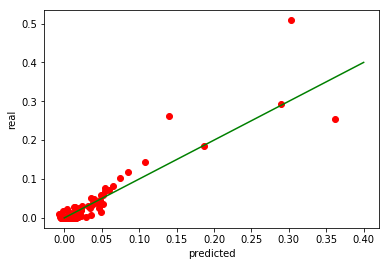

In [83]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

pl.savefig('wwo_model_results/linear_all_scatterplot.png')

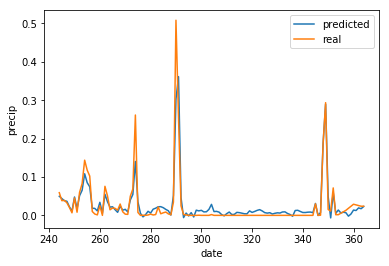

In [84]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

pl.savefig('wwo_model_results/linear_all_linegraph.png')

## Multiple Linear Regression using 10-fold cross validation

In [85]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [86]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train)
print('RMSE on training: %.6f'  %rmse_train)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv)

Method: Simple Linear Regression
R2 score on training: 0.841190
RMSE on training: 0.026373
RMSE on 10-fold CV: 0.022646


# Using Correlated Weather Variables

In [87]:
# Remove unused columns and reorder 
FILENAME = "engineered_worldweatheronline_normalized_manila_2015_1day"
weather_dataset = pd.read_csv("windows_" + FILENAME + "/" + FILENAME + "_win" + str(WINDOW) + ".csv", skipinitialspace=True)
weather_dataset = weather_dataset.drop(weather_dataset.columns[0], axis=1)

cols_to_remove = []
# For Window 1 LANG
temp = list(range(12, 16))
windspd = list(range(16, 20))
cond = list(range(20, 24))
hum = list(range(24, 28))
vis = list(range(28, 32))
pres = list(range(32, 36))
cloud = list(range(36, 40))
heatindex = list(range(40, 44))
dewpoint = list(range(44, 48))
windchill = list(range(48, 52))
windgust = list(range(52, 56))
feelslike = list(range(56, 60))


# For Window 2 and above
if WINDOW >= 2:
    temp = list(range(12, 15))
    windspd = list(range(15, 18))
    cond = list(range(18, 21))
    hum = list(range(21, 24))
    vis = list(range(24, 27))
    pres = list(range(27, 30))
    cloud = list(range(30, 33))
    heatindex = list(range(33, 36))
    dewpoint = list(range(36, 39))
    windchill = list(range(39, 42))
    windgust = list(range(42, 45))
    feelslike = list(range(45, 48))


cols_to_remove = [temp  + windspd + vis + pres + heatindex + windchill + windgust + feelslike]
# cols_to_remove = [temp  + windspd + cond + hum + vis + pres + cloud + heatindex + dewpoint + windchill + windgust + feelslike]
w = weather_dataset.drop(weather_dataset.columns[cols_to_remove], axis=1, inplace = False)


#Original Features
cols_to_remove = [0, 1, 4, 5, 7, 9, 10, 11]

w = w.drop(w.columns[cols_to_remove], axis=1, inplace = False)
weather_dataset = w
weather_dataset.head()


,cond,humidity,cloudcover,dewPointC,cond_Rmean (window = 4),cond_Rmin (window = 4),cond_Rmax (window = 4),humidity_Rmean (window = 4),humidity_Rmin (window = 4),humidity_Rmax (window = 4),cloudcover_Rmean (window = 4),cloudcover_Rmin (window = 4),cloudcover_Rmax (window = 4),dewPointC_Rmean (window = 4),dewPointC_Rmin (window = 4),dewPointC_Rmax (window = 4)
0,0.565789,0.810009,0.333906,0.569311,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.585526,0.765097,0.308802,0.504407,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.631579,0.808877,0.484427,0.570513,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.580044,0.838240,0.418542,0.612179,0.141447,0.0,0.565789,0.202502,0.0,0.810009,0.083477,0.0,0.333906,0.142328,0.0,0.569311
4,0.399123,0.842995,0.361146,0.685897,0.287829,0.0,1.151316,0.393776,0.0,1.575106,0.160677,0.0,0.642708,0.268429,0.0,1.073718


In [88]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = precip

## Multiple Linear Regression using train_test_split

In [89]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
p = linreg.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train_corr = r2_score(Y_test, p)
rmse_train_corr = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train_corr)
print("RMSE", rmse_train_corr)

R2 score 0.406219969612
RMSE 0.0509951499778


In [91]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ -2.21627431e-03   1.41925579e-01   9.40153253e-02   1.62394593e-02
  -8.80905544e-03   1.21086578e-01  -3.52362217e-02  -8.82350808e-04
  -1.37519081e-02  -3.52940323e-03   5.40786792e-03  -9.03251624e-02
   2.16314717e-02  -1.33455992e-04   7.32592889e-02  -5.33823968e-04
   0.00000000e+00]


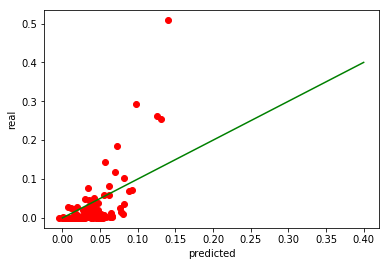

In [92]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

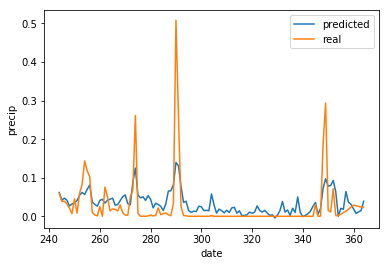

In [93]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

## Multiple Linear Regression using 10-fold cross validation

In [94]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv_corr = np.sqrt(xval_err/len(x))

In [95]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train_corr)
print('RMSE on training: %.6f'  %rmse_train_corr)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv_corr)

Method: Simple Linear Regression
R2 score on training: 0.406220
RMSE on training: 0.050995
RMSE on 10-fold CV: 0.047749
